In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
data_train_path = '../content/drive/MyDrive/Fruits_Vegetables/train'
data_test_path = '../content/drive/MyDrive/Fruits_Vegetables/test'
data_validation_path = '../content/drive/MyDrive/Fruits_Vegetables/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_validation = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 351 files belonging to 36 classes.


In [7]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width, img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


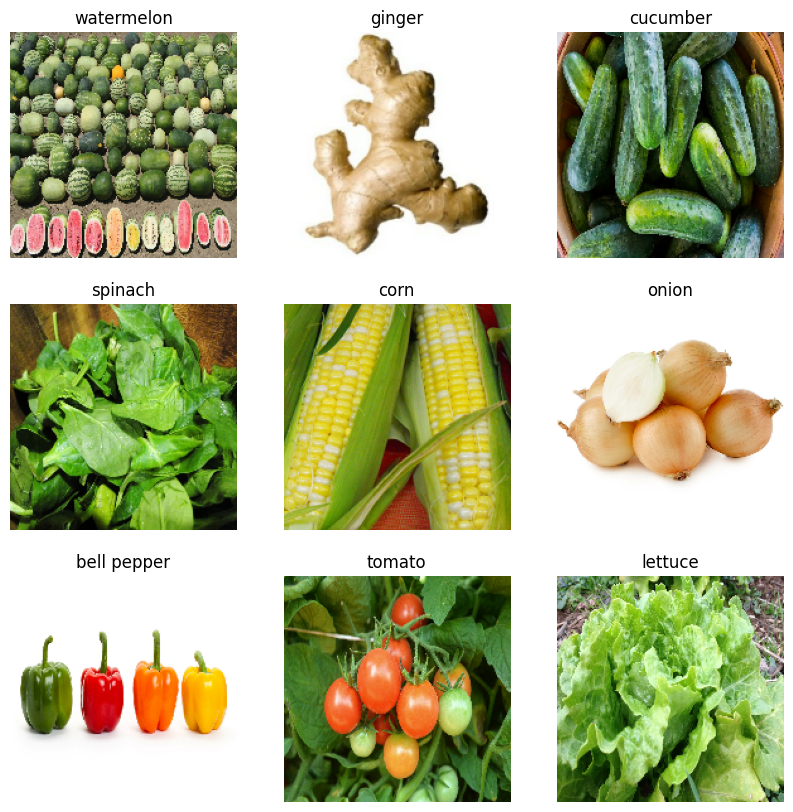

In [8]:
plt.figure(figsize=(10,10))
for images, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [9]:
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(), # reduces dimensions and highlights sharp features
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2), # prevents overfitting
    layers.Dense(120), # calculating output = activation(dot(input, kernel) + bias)
    layers.Dense(len(data_cat))
])

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [16]:
epochs = 25
history = model.fit(data_train, validation_data=data_validation, epochs=epochs)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 228s 2s/step - accuracy: 0.0514 - loss: 3.8847 - val_accuracy: 0.2593 - val_loss: 2.5514
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 76s 772ms/step - accuracy: 0.2519 - loss: 2.6669 - val_accuracy: 0.4701 - val_loss: 1.8100
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 84s 792ms/step - accuracy: 0.4427 - loss: 1.9837 - val_accuracy: 0.7721 - val_loss: 0.9279
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 782ms/step - accuracy: 0.6332 - loss: 1.2869 - val_accuracy: 0.8291 - val_loss: 0.6539
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 79s 809ms/step - accuracy: 0.7629 - loss: 0.8159 - val_accuracy: 0.9231 - val_loss: 0.4078
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 766ms/step - accuracy: 0.8742 - loss: 0.4463 - val_accuracy: 0.9516 - val_loss: 0.3210
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 86s 810ms/step - accuracy: 0.9340 - loss: 0.2802 - val_accuracy: 0.9487 - val_loss: 0.3502
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 78s 770ms/step - accuracy: 0.9619 - loss: 0.1907 - val_accura

Text(0.5, 1.0, 'Loss')

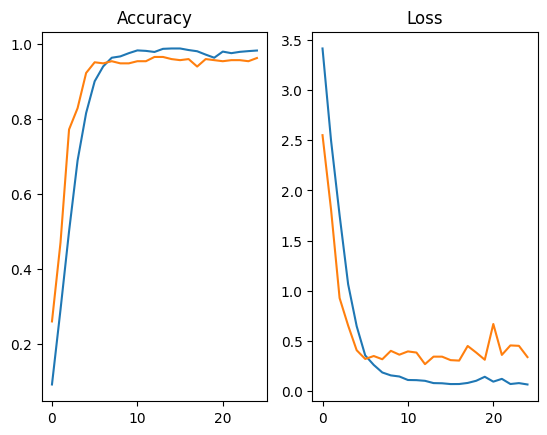

In [18]:
epochs_range = range(epochs)
plt.figsize = (8,8)
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label="training accuracy")
plt.plot(epochs_range, history.history['val_accuracy'], label="validation accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label="training loss")
plt.plot(epochs_range, history.history['val_loss'], label="validation loss")
plt.title('Loss')

In [40]:
image = 'apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_width, img_height))
imput_array = tf.keras.utils.img_to_array(image)
image_batch = tf.expand_dims(imput_array, 0)

In [41]:
predict = model.predict(image_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [42]:
score = tf.nn.softmax(predict)
print("This is an image of {} with accuracy = {:0.2f}".format(data_cat[np.argmax(score)], 100*np.max(score)))

This is an image of tomato with accuracy = 92.81


In [43]:
model.save('Image_Classifier.keras')